In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import cv2


# Import image
img = plt.imread("D:/EntornosPython/imgs/cell.png")

# Create float
bgr = img.astype(float)/255.


In [3]:

# Extract channels
with np.errstate(invalid='ignore', divide='ignore'):
	K = 1 - np.max(bgr, axis=2)
	C = (1-bgr[...,2] - K)/(1-K)
	M = (1-bgr[...,1] - K)/(1-K)
	Y = (1-bgr[...,0] - K)/(1-K)

# Convert the input BGR image to CMYK colorspace
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

# Split CMYK channels
Y, M, C, K = cv2.split(CMYK)

np.isfinite(C).all()
np.isfinite(M).all()
np.isfinite(K).all()
np.isfinite(Y).all()

# Save channels
# cv2.imshow('C.jpg', C)
# cv2.imshow('M.jpg', M)
# cv2.imshow('Y.jpg', Y)
# cv2.imshow('K.jpg', K)
cv2.imwrite('C.jpg', C)
cv2.imwrite('M.jpg', M)
cv2.imwrite('Y.jpg', Y)
cv2.imwrite('K.jpg', K)


True

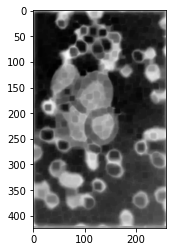

In [4]:


#EqualizationHistogram
equ = cv2.equalizeHist(Y)

# stacking images side-by-side
#res = np.hstack((Y, equ))
#print(res)
#plt.imshow(equ,cmap='gray')
###


#Linear Contrast
linear = (Y-np.amin(Y))*((255-0)/(np.amax(Y)-np.amin(Y)))
#plt.imshow(equ,cmap='gray')
ei = 2*linear + equ
#plt.imshow(ei)
####
#Filtro minimo
size = (3, 3)
shape = cv2.MORPH_RECT
kernel = cv2.getStructuringElement(shape, size)
imgResult = cv2.erode(ei, kernel)
imgResult = cv2.erode(imgResult, kernel)
imgResult = cv2.erode(imgResult, kernel)
plt.imshow(imgResult,cmap="gray")

####

#Otsu threesholding


In [21]:
RGB_SCALE = 255
CMYK_SCALE = 100


def rgb_to_cmyk(r, g, b):
    if (r, g, b) == (0, 0, 0):
        # black
        return 0, 0, 0, CMYK_SCALE

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE

    # extract out k [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    # rescale to the range [0,CMYK_SCALE]
    return c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE

In [22]:
h,w,c = img.shape

In [23]:
	
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

C = gray.copy()
M = gray.copy()
Y = gray.copy()
K = gray.copy()

In [24]:
for i in range(h):
    for j in range(w):
        r = img[i][j][0]
        g = img[i][j][1]
        b = img[i][j][2]
        C_,M_,Y_,K_ = rgb_to_cmyk(r,g,b)
        C[i][j] = C_
        M[i][j] = M_
        Y[i][j] = Y_
        K[i][j] = K_
        
        
        
        

In [25]:
print(C.shape)
print(C)

(480, 640)
[[ 0  0  0 ...  6  6  6]
 [ 0  0  0 ...  6  6  6]
 [ 0  0  0 ...  5  5  5]
 ...
 [ 0  0  0 ... 12 13 12]
 [ 0  0  0 ... 12 14 13]
 [ 0  0  0 ... 12 14 14]]


In [26]:
cv2.imwrite('C.jpg', C)
cv2.imwrite('M.jpg', M)
cv2.imwrite('Y.jpg', Y)
cv2.imwrite('K.jpg', K)

True